# Lambas: Parameterisation and Dimensional Reduction of REE Data

**Intro** [Start](0.0_StartHere.ipynb) • [Intro](1.1_Introduction.ipynb)
<br> **pyrolite** [Geochem](2.1_pyroliteGeochem.ipynb) • [Visualisation](2.2_pyroliteVis.ipynb) • [alphaMELTS](2.3_pyroliteMELTS.ipynb) • <mark>[lambdas](2.4_lambdas.ipynb)</mark> <br>  **Comparative Geochem**  [Databases, Data Mining and Deriving Context](3.1_ComparativeGeochemData.ipynb)<br>  **Machine Learning** [Intro](4.0_MachineLearning.ipynb) • [Features](4.1_Features.ipynb) •  [High-D Vis](4.3_HighDVis.ipynb) • [Classification](4.4_Classification.ipynb) • [Regression & Prediction](4.5_Regression.ipynb) • [Clustering](4.6_Clustering.ipynb) <br>  **GitHub** [geochem4nickel](https://github.com/morganjwilliams/geochem4nickel) • [pyrolite](https://github.com/morganjwilliams/pyrolite)

#### <i class="fa fa-twitter" aria-hidden="true"><a href="https://twitter.com/metasomite" style="font-family:Courier New,Courier,Lucida Sans Typewriter,Lucida Typewriter,monospace;"> @metasomite</a></i>

### Lambdas: Parameterisation and Dimensional Reduction of REE Data

Orthogonal polynomial decomposition can be used for dimensional reduction of smooth function over an independent variable, producing an array of independent values representing the relative weights for each order of component polynomial.

In geochemistry, the most applicable use case is for reduction Rare Earth Element (REE) profiles ([O'Neill2016]). The REE are a collection of elements with broadly similar physicochemical properties (the lanthanides), which vary with ionic radii. Given their similar behaviour and typically smooth function of normalised abundance vs. ionic radii, the REE profiles and their shapes can be effectively parameterised and dimensionally reduced (14 elements summarised by 3-4 shape parameters).

[O'Neill2016]: https://doi.org/10.1093/petrology/egw047 "O’Neill, H.S.C., 2016. The Smoothness and Shapes of Chondrite-normalized Rare Earth Element Patterns in Basalts. J Petrology 57, 1463–1508. https://doi.org/10.1093/petrology/egw047"

This is effectively fitting a sum of weighted independent polynomials to the REE profile, where the weights are then used to represent the curve. This provides a meaningful way to describe REE profile shape. Below is an example of how this can be visualised using the weighted contributions for increasing orders of polynomials.

<img src="https://pyrolite.readthedocs.io/en/develop/_images/OrthogPolyDeconstruction.png" width="65%"/>

Here we use some example data from [Ueki2018] and reduce the REE data to lambda values, and plot the resulting dimensionally reduced data.

[Ueki2018]: https://doi.org/10.1029/2017GC007401 "Ueki, K., Hino, H., Kuwatani, T., 2018. Geochemical Discrimination and Characteristics of Magmatic Tectonic Settings: A Machine-Learning-Based Approach. Geochemistry, Geophysics, Geosystems 19, 1327–1347."

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pyrolite.plot
from pyrolite.geochem.ind import REE

df = pd.read_csv("https://storage.googleapis.com/aegc2019/ueki2018.csv").head(500)

This dataset includes rocks with a range of REE profiles, but doesn't have data for all of the rare earths. We can calcuate the profile with fewer elmeents, but expect that the resulting values are less precise (especially for any higher order terms), and generally avoid comparing these to lambdas derived from complete REE profiles where possible.

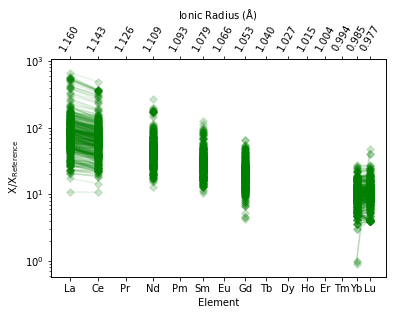

In [2]:
df.pyrochem.normalize_to("Chondrite_PON").pyroplot.REE(
    index="elements", color="g", alpha=0.1
)

pyrolite includes a convenient function for calculating lambdas:

In [3]:
lambdas = df.pyrochem.lambda_lnREE(
    exclude=["Eu", "Pm"], degree=4, norm_to="Chondrite_PON"
)

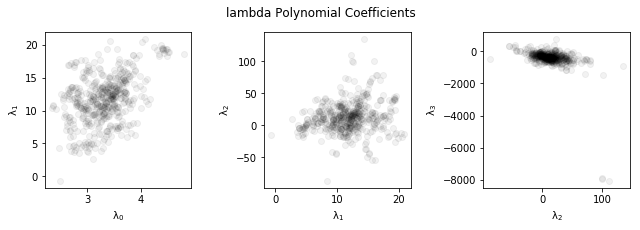

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3))
ax_labels = [chr(955) + "$_{}$".format(str(d)) for d in range(4)]
columns = [chr(955) + str(d) for d in range(4)]

for ix, a in enumerate(ax):
    a.scatter(lambdas[columns[ix]], lambdas[columns[ix + 1]], alpha=0.05, c="k")
    a.set_xlabel(ax_labels[ix])
    a.set_ylabel(ax_labels[ix + 1])

plt.tight_layout()
fig.suptitle("lambda Polynomial Coefficients", y=1.05);

Next: [Comparative Geochem: Data and Data Mining](3.1_ComparativeGeochemData.ipynb)